LED linearization based on brightness measurement
==========================================

When using a LED the intensity of the light emitted is not directly propotional to the voltage applied. In order to get access to a linear behaviour of LED intensity we approximate the LED behavoir by a function. In this notebook the measured LED behaviour as well as the approximation is shown in a graph.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import locale
locale.setlocale(locale.LC_ALL, 'deu_deu')



'German_Germany.1252'

We choose to use 4 LEDs, all ordered from this website http://www.roithner-laser.com/led_diverse.html.
The names of the files describing the LEDs are as follows (saved from german Excel as *.csv):

1. RLS_B465 (testing only)
2. 364nm_RLT360-BL-TO18
3. 419nm_VL415_5_15
4. 419nm_VL415_5_15_Evelyn
5. 486nm_RLS_5B_475_S
6. 486nm_RLS_5B_475_S_Evelyn
7. 576nm_B5B_433_20

Measured in August 2019:
1. VL415_5_15_A_420nm
2. RLS_5B_475_S_A_490nm
3. B5B_433_20_A_570nm

For Evelyn to be integrated into Huzzah:
1. LED590_33W_AB_593nm
2. RLS_5B_475_S_AB_484nm
3. VL415_5_15_A_68_Ohm_420nm
4. VL415_5_15_B_22_Ohm_420nm
5. RLT_360_15_30_3CC_15_Ohm_363nm

Insert the name of the LED you want to see in the following line, the program will rescale the 12 bit measurement onto a 16 bit scale and provide the values:

In [2]:
ledName = "RLT_360_15_30_3CC_15_Ohm_363nm"

measurementData = pd.read_csv(ledName+".csv", sep = ';')
(xss, yss) = np.hsplit(measurementData.values, 2)
xs = []
ys = []
for i in range(xss.size):
    xs.append(xss[i][0])
    ys.append(locale.atof(yss[i][0]))

xsmax = max(xs)
ysmax = max(ys)
for i in range(len(ys)):
    xs[i] = 65535*xs[i]/xsmax
    ys[i] = 65535*ys[i]/ysmax
    
list(zip(xs,ys))

[(39321.0, 0.0),
 (39976.35, 5.2850806451612895),
 (45874.5, 158.5524193548387),
 (49151.25, 2642.540322580645),
 (52428.0, 12684.193548387097),
 (55704.75, 33824.51612903226),
 (58981.5, 56550.3629032258),
 (62258.25, 65535.0),
 (65535.0, 65535.0)]

Now optimize the approximation function for the measurements!
Note that each section applies to one specific LED. Please insert the correct name of the data file - there is only one file per LED even id there might be several calibrations!

In [3]:
def convertIntensity_RLS_B465(intensity, maxIntensity):
    if intensity == 0:
        targetIntensity = 25600
    else:
        #targetIntensity = 25600+(24000*intensity/65535);
        targetIntensity = 28800+(20800*intensity/65535);
    return targetIntensity*maxIntensity/65535;

In [4]:
def convertIntensity_364nm_RLT360(intensity, maxIntensity):
    if intensity == 0:
        targetIntensity = 38000
    else:
        targetIntensity = 45000+(15700*intensity/65535);
    return targetIntensity*maxIntensity/65535;

In [5]:
def convertIntensity_419nm_VL415_5_15_Evelyn(intensity, maxIntensity):
    if intensity == 0:
        targetIntensity = 31000
    else:
        targetIntensity = 44500+(19000*intensity/65535);
    return targetIntensity*maxIntensity/65535;

In [6]:
def convertIntensity_486nm_RLS_5B_475_S_Evelyn(intensity, maxIntensity):
    if intensity == 0:
        targetIntensity = 31000
    else:
        targetIntensity = 37500+(24000*intensity/65535);
    return targetIntensity*maxIntensity/65535;

In [7]:
def convertIntensity_576nm_B5B(intensity, maxIntensity):
    if intensity == 0:
        targetIntensity = 20000
    else:
        targetIntensity = 25500+(14500*intensity/65535);
    return targetIntensity*maxIntensity/65535;

In [8]:
def convertIntensity_VL415_5_15_A_420nm(intensity, maxIntensity):
    if intensity == 0:
        targetIntensity = 37000
    else:
        targetIntensity = 44000+(21200*intensity/65535);
    return targetIntensity*maxIntensity/65535;

In [9]:
def convertIntensity_RLS_5B_475_S_A_490nm(intensity, maxIntensity):
    if intensity == 0:
        targetIntensity = 32000
    else:
        targetIntensity = 37000+(27000*intensity/65535);
    return targetIntensity*maxIntensity/65535;

In [10]:
def convertIntensity_B5B_433_20_A_570nm(intensity, maxIntensity):
    if intensity == 0:
        targetIntensity = 28000
    else:
        targetIntensity = 29000+(5000*intensity/65535);
    return targetIntensity*maxIntensity/65535;

In [11]:
def convertIntensity_LED590_33W_AB_593nm(intensity, maxIntensity):
    if intensity == 0:
        targetIntensity = 24000
    else:
        targetIntensity = 29000+(23000*intensity/65535);
    return targetIntensity*maxIntensity/65535;

In [12]:
def convertIntensity_RLS_5B_475_S_AB_484nm(intensity, maxIntensity):
    if intensity == 0:
        targetIntensity = 36000
    else:
        targetIntensity = 42500+(23000*intensity/65535);
    return targetIntensity*maxIntensity/65535;

In [13]:
def convertIntensity_VL415_5_15_A_68_Ohm_420nm(intensity, maxIntensity):
    if intensity == 0:
        targetIntensity = 41000
    else:
        targetIntensity = 48500+(16500*intensity/65535);
    return targetIntensity*maxIntensity/65535;

In [14]:
def convertIntensity_VL415_5_15_B_22_Ohm_420nm(intensity, maxIntensity):
    if intensity == 0:
        targetIntensity = 39500
    else:
        targetIntensity = 47000+(12300*intensity/65535);
    return targetIntensity*maxIntensity/65535;

In [15]:
def convertIntensity_RLT_360_15_30_3CC_15_Ohm_363nm(intensity, maxIntensity):
    if intensity == 0:
        targetIntensity = 39300
    else:
        targetIntensity = 49300+(11500*intensity/65535);
    return targetIntensity*maxIntensity/65535;

The following section computes the increase of brightness of the LED on a 16 bit scale using the approximation defined above.

In [16]:
xs_calc = range(0, 65535, 2048)
ys_calc = []
f = globals()["convertIntensity_%s" % ledName]
for i in range(len(xs_calc)):
    ys_calc.append(f(xs_calc[i], 65535))
print("Calculated intensities\n")
#display(ys_calc)
list(zip(xs,ys_calc))

Calculated intensities



[(39321.0, 39300.0),
 (39976.35, 49659.38048371099),
 (45874.5, 50018.760967421986),
 (49151.25, 50378.141451132986),
 (52428.0, 50737.52193484398),
 (55704.75, 51096.90241855497),
 (58981.5, 51456.282902265964),
 (62258.25, 51815.66338597696),
 (65535.0, 52175.04386968795)]

Result
=========

Finally one can see the measured values in black and the values calculated by the aaproximation function in red.


'RLT_360_15_30_3CC_15_Ohm_363nm'

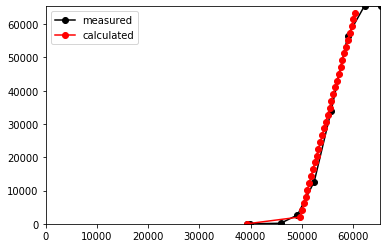

In [17]:
display(ledName)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(xs, ys, '-ok', color='black', label="measured")
ax1.plot(ys_calc, xs_calc, '-ok', color='red', label="calculated")
plt.axis([0, 65335, 0, 65335])
plt.legend(loc='upper left');
plt.show()
